In [1]:
from Dosepy.image import load
from Dosepy.calibration import LUT
from pathlib import Path
import os
import numpy as np

Handle the tif image

In [12]:
cwd = Path(os.getcwd()).parent
tif_path = cwd / "unit" / "fixtures" / "CAL20241106_001.tif"
img = load(tif_path)

Create the calibration object

In [3]:
cal = LUT(img)

cal.set_central_rois()
cal.set_doses([0, 0.5, 1, 2, 4, 6, 8, 10])

beam_profile_path = cwd / "unit" / "fixtures" / "CAL" / "BeamProfile.csv"
cal.set_beam_profile(beam_profile_path)
cal.compute_lateral_lut(filter=3)

Object num. 1
Object num. 2
Object num. 3
Object num. 4
Object num. 5
Object num. 6
Object num. 7
Object num. 8
Object num. 9
Object num. 10
Object num. 11


In [4]:
cal.get_intensities_of_optical_filters()

[np.float64(9345.80223463687),
 np.float64(13276.548317046689),
 np.float64(20716.026652452027)]

Load another image with optical filters

In [5]:
# Verification img
file_path = cwd / "unit" / "fixtures" / "Ver_050dpi20241106_001.tif"

img = load(file_path)
#img.set_labeled_films_and_filters()

optical_filters = img.get_optical_filters()

Object num. 1
Object num. 2
Object num. 3
Object num. 4
Object num. 5


In [6]:
optical_filters["rois_for_optical_filters"]

[{'x': 405, 'y': 603, 'radius': 17},
 {'x': 406, 'y': 458, 'radius': 17},
 {'x': 408, 'y': 311, 'radius': 16}]

In [7]:
optical_filters["intensities_of_optical_filters"]

[np.float64(9335.516201117318),
 np.float64(13275.740499457112),
 np.float64(20734.8141025641)]

In [8]:
all(np.isclose(
    optical_filters["intensities_of_optical_filters"],
    cal.get_intensities_of_optical_filters(),
    rtol=1e-2,
    ).tolist())

True

In [9]:
from Dosepy.calibration import passed_QC

passed_QC(img, cal)

True

Handle another image without optical filters

Object num. 1
Object num. 2
Object num. 3
Object num. 4
Object num. 5
Object num. 6
Object num. 7
Object num. 8
Object num. 9
Optical filters not found
QC not peformed. There is not optical filter in the image.


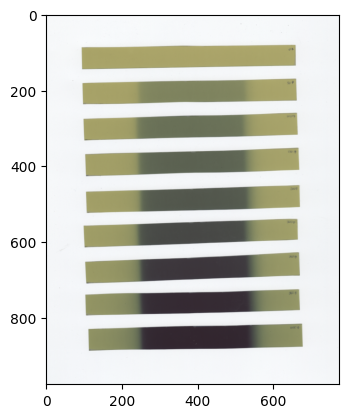

<Axes: >

In [13]:
tif_path = cwd / "unit" / "fixtures" / "image.tif"
img = load(tif_path)

passed_QC(img, cal)

img.plot()

In [15]:
tif_path = cwd / "unit" / "fixtures" / "image.tif"
cal_img_without_filters = load(tif_path)

cal = LUT(cal_img_without_filters)
cal.set_central_rois()
cal.set_doses([0, 0.5, 1, 1.5, 2, 3, 5, 8, 10])

cal.compute_central_lut()

file_path = cwd / "unit" / "fixtures/Ver_050dpi20241106_001.tif"
verification_image_with_filters = load(file_path)

passed_QC(verification_image_with_filters,
          cal,
          )


Object num. 1
Object num. 2
Object num. 3
Object num. 4
Object num. 5
Object num. 6
Object num. 7
Object num. 8
Object num. 9
QC not peformed. There is not optical filter in lut.


False